Финальный выход сети:
 [[0.3144799 ]
 [0.03863187]
 [0.76374043]]
Финальная ошибка:
 [[-0.0144799 ]
 [-0.53863187]
 [ 0.03625957]]
Финальные веса W1:
 [[-0.06462352  0.25977618]
 [ 0.25309121 -0.05469975]
 [-0.10744196 -0.30535015]]
Финальные смещения b1:
 [[-0.23851881]
 [ 0.50444279]
 [ 0.30803616]]
Финальные веса W2:
 [[-0.03838921 -0.53298916  0.05812451]
 [-0.42627589 -1.11212368 -1.04818809]
 [ 0.07550859  0.28197478  0.37925128]]
Финальные смещения b2:
 [[-0.45243501]
 [-1.70136576]
 [ 0.73619007]]


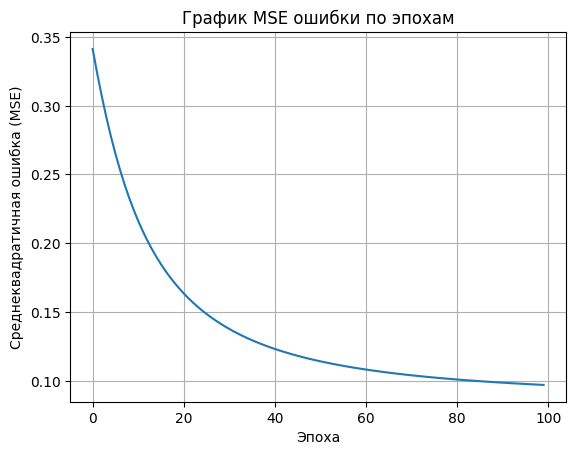

In [1]:
# Вариант №3: Архитектура 2-3-3, скорость обучения 0.25

import numpy as np
import matplotlib.pyplot as plt

# --- Данные ---
X = np.array([[0.4], [-0.4]])                # Входной вектор (2, 1)
Y = np.array([[0.3], [-0.5], [0.8]])         # Эталонный выход (3, 1)

# --- Параметры ---
learning_rate = 0.25
epochs = 100
np.random.seed(42)  # Чтобы результаты были воспроизводимыми

# --- Функции ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# --- Инициализация весов и смещений ---
W1 = np.random.uniform(-0.3, 0.3, (3, 2))  # веса вход -> скрытый слой (3x2)
b1 = np.random.uniform(-0.3, 0.3, (3, 1))  # смещения скрытого слоя (3x1)

W2 = np.random.uniform(-0.3, 0.3, (3, 3))  # веса скрытый -> выходной слой (3x3)
b2 = np.random.uniform(-0.3, 0.3, (3, 1))  # смещения выходного слоя (3x1)

# --- Тренировка ---
errors = []

for epoch in range(epochs):
    # Прямой проход
    net_h = np.dot(W1, X) + b1
    out_h = sigmoid(net_h)

    net_o = np.dot(W2, out_h) + b2
    out_o = sigmoid(net_o)

    # Вычисление ошибки
    error = Y - out_o
    mse = np.mean(error**2)
    errors.append(mse)

    # Обратное распространение ошибки
    delta_o = error * sigmoid_derivative(net_o)
    delta_h = np.dot(W2.T, delta_o) * sigmoid_derivative(net_h)

    # Обновление весов и смещений
    W2 += learning_rate * np.dot(delta_o, out_h.T)
    b2 += learning_rate * delta_o

    W1 += learning_rate * np.dot(delta_h, X.T)
    b1 += learning_rate * delta_h

# --- Вывод результатов ---
print("Финальный выход сети:\n", out_o)
print("Финальная ошибка:\n", error)
print("Финальные веса W1:\n", W1)
print("Финальные смещения b1:\n", b1)
print("Финальные веса W2:\n", W2)
print("Финальные смещения b2:\n", b2)

# --- График ошибки ---
plt.plot(errors)
plt.title("График MSE ошибки по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.grid(True)
plt.show()
